Comparing Optical Character Recognition on document, image with quotes, and segmented image with quotes

In [1]:
!pip install -q keras-ocr

In [2]:
import keras_ocr
from matplotlib import pyplot as plt
import numpy as np
import time

In [3]:
pipeline= keras_ocr.pipeline.Pipeline()

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


In [4]:
images = [
    keras_ocr.tools.read(img) for img in ['/content/Gambar-KHS.png',
                                          '/content/thumb-1920-316008.jpg',
                                          '/content/thumb-1920-316008 - painted.jpg'
    ]
]

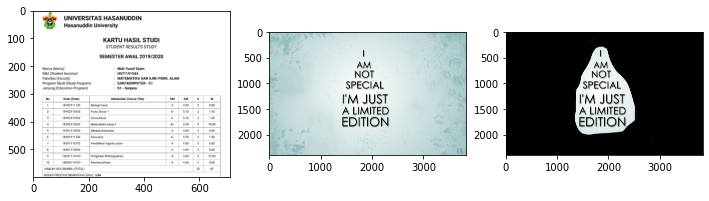

In [5]:
fig, ax= plt.subplots(nrows=1, ncols=3, figsize=(12,4))

for i in range(len(images)):
    ax[i].imshow(images[i])
    # ax[i].set_axis('off')

plt.show()

In [6]:
expanded_images= [np.expand_dims(i, 0) for i in images]

In [7]:
start= time.time()

prediction1 = pipeline.recognize(expanded_images[0])

print('Running time for first image: {:.3f} second'.format(time.time()-start))

Running time for first image: 16.712 second


In [8]:
start= time.time()

prediction2 = pipeline.recognize(expanded_images[1])

print('Running time for second image: {:.3f} second'.format(time.time()-start))

Running time for second image: 11.880 second


In [9]:
start= time.time()

prediction3 = pipeline.recognize(expanded_images[2])

print('Running time for third image: {:.3f} second'.format(time.time()-start))

Running time for third image: 0.916 second


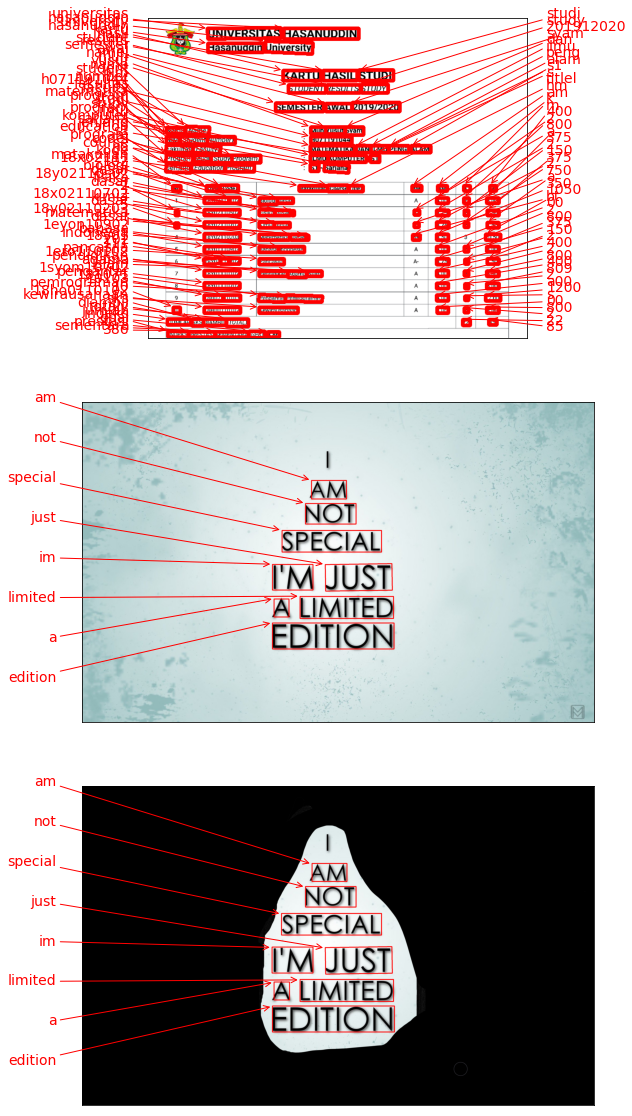

In [10]:
fig, axs = plt.subplots(nrows=len(expanded_images), figsize=(10, 20))
for ax, image, predictions in zip(axs, images, [prediction1[0], prediction2[0], prediction3[0]]):
    keras_ocr.tools.drawAnnotations(image=image, 
                                    predictions=predictions, 
                                    ax=ax)